In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from pprint import pprint
import matplotlib.pyplot as plt

from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as ep

ep.update_plot_defaults()

In [4]:
tensor_normalize = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.1307],std=[0.3081])])

MNIST_train = torchvision.datasets.MNIST(root='../datasets/MNIST_data/',train=True,transform=tensor_normalize,download=True)
MNIST_train_sub = torch.utils.data.Subset(MNIST_train, range(1000))

MNIST_test = torchvision.datasets.MNIST(root='../datasets/MNIST_data/',train=False,transform=tensor_normalize,download=True)

torch.manual_seed(42)
dataloader = torch.utils.data.DataLoader(MNIST_train,
                                         shuffle=True)

dataloader_sub = torch.utils.data.DataLoader(MNIST_train_sub,
                                             shuffle=True)

test_dataloader = torch.utils.data.DataLoader(MNIST_test,
                                              batch_size=10000,
                                              shuffle=True)

In [3]:
flat_MNIST_train = []
for idx,(data,target) in enumerate(MNIST_train):
    data = data[0].flatten()
    target = torch.eye(10)[target]
    flat_MNIST_train.append((idx,data,target))
    
dataloader = torch.utils.data.DataLoader(flat_MNIST_train,
                                         shuffle=True)

dataloader_sub = torch.utils.data.DataLoader(flat_MNIST_train[:2000],
                                         shuffle=True)

### Backprop (no weight contraints)

In [4]:
network_config = ut.read_from_yaml('../config/EIANN_1_hidden_mnist_backprop_relu_SGD_config.yaml')
pprint(network_config)

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

seed=42
network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

{'layer_config': {'H1': {'E': {'activation': 'relu', 'size': 500}},
                  'H2': {'E': {'activation': 'relu', 'size': 500}},
                  'Input': {'E': {'size': 784}},
                  'Output': {'E': {'activation': 'relu', 'size': 10}}},
 'projection_config': {'H1': {'E': {'Input': {'E': {'direction': 'F',
                                                    'learning_rule': 'Backprop'}}}},
                       'H2': {'E': {'H1': {'E': {'direction': 'F',
                                                 'learning_rule': 'Backprop'}}}},
                       'Output': {'E': {'H2': {'E': {'direction': 'F',
                                                     'learning_rule': 'Backprop'}}}}},
 'training_kwargs': {'backward_steps': 1,
                     'forward_steps': 1,
                     'learning_rate': 0.01,
                     'optimizer': 'SGD',
                     'tau': 1,
                     'verbose': False}}


In [5]:
network.train(dataloader_sub, 
              epochs=1, 
              store_history=False, 
              status_bar=True)

100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


tensor(0.0635)

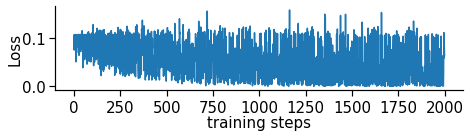

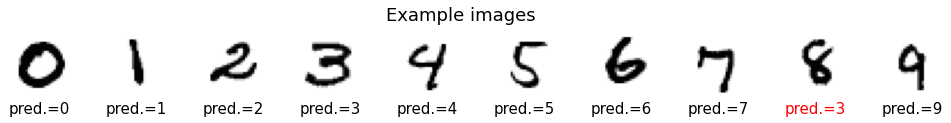

Final accuracy = 79.16999816894531%


In [6]:
ep.plot_performance(network)
ep.plot_MNIST_examples(network, test_dataloader)
ut.compute_accuracy(network, test_dataloader)

### Backprop (Dale's Law)

In [7]:
network_config = ut.read_from_yaml('../config/EIANN_1_hidden_mnist_backpropDale_relu_SGD_config.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

seed=42
network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

In [8]:
network.train(dataloader_sub, 
              epochs=1, 
              store_history=False, 
              status_bar=True)

100%|██████████| 1/1 [00:12<00:00, 12.04s/it]


tensor(0.1000)

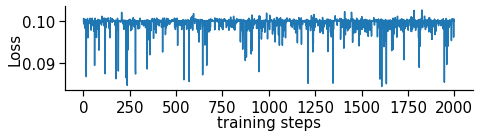

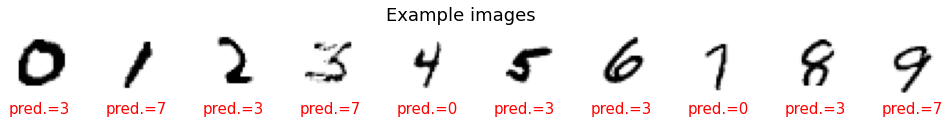

Final accuracy = 11.859999656677246%


In [9]:
ep.plot_performance(network)
ep.plot_MNIST_examples(network, test_dataloader)
ut.compute_accuracy(network, test_dataloader)